In [50]:
import numpy as np
import astropy.table as tbl
import matplotlib.pyplot as plt
import json
import astropy.time as time
import speclite

In [39]:
spec_late = tbl.Table.read('../data/specs/ZTF19abqwtfu_20191021_NOT_v1.ascii', format='ascii')

odp_peak = 58733
odp_time = time.Time('2019-10-21').mjd
odp_dt = odp_time - odp_peak
odp_dt

44.0

In [3]:
with open('sn2008ax_specs.json', 'r') as f:
    sn2008ax_specs = json.load(f)

In [4]:
peak_epoch = time.Time('2008-03-22').mjd
peak_epoch

54547.0

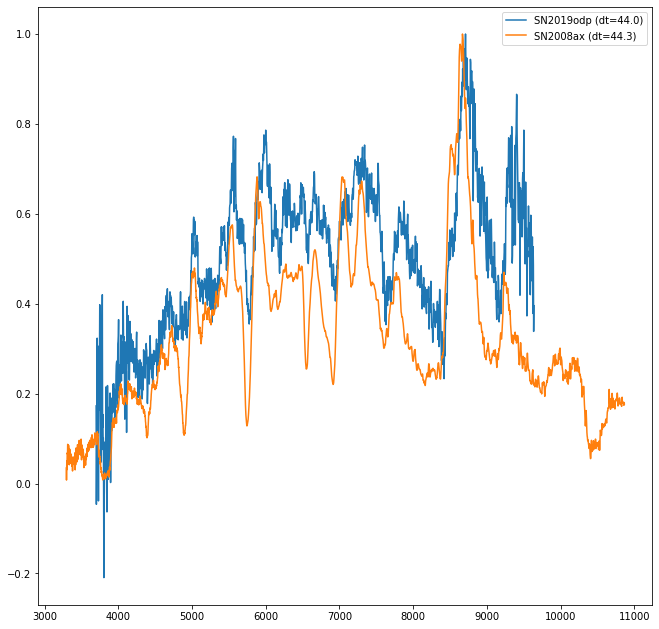

In [105]:
plt.figure(figsize=(11,11))
plt.plot(spec_late['col1'], spec_late['col2']/np.nanmax(spec_late['col2']), label='SN2019odp (dt=%.1f)' % odp_dt)
s = sn2008ax_specs['SN2008ax']['spectra'][56]
dt = float(s[0]) - peak_epoch
if len(s[1][0]) == 2:
    wave_raw, flux_raw = zip(*s[1])
else:
    wave_raw, flux_raw, err = zip(*s[1])
wave = np.array(list(map(float, wave_raw)))
flux = np.array(list(map(float, flux_raw)))
plt.plot(wave, flux/np.nanmax(flux), label='SN2008ax (dt=%.1f)' % dt)
plt.legend()

6 -11.0 [121.67776261]
9 -10.0 [76.97536827]
11 -9.0 [130.24049405]
24 3.0 [117.11569598]
25 6.0 [143.58231305]
26 8.0 [139.12214635]
27 8.0 [142.34953672]
32 11.0 [138.1911188]
40 17.30000000000291 [132.7220803]
44 22.30000000000291 [144.0174076]
49 34.400000000001455 [137.1947501]
51 37.0 [116.60360819]
52 37.0 [116.60360172]
53 37.599999999998545 [129.00564111]
55 41.0 [108.82181574]
56 44.30000000000291 [109.21334987]
58 49.0 [86.34427307]
59 66.40000000000146 [81.73677307]
64 82.0 [68.63916274]
68 99.19999999999709 [65.78178464]
71 124.0 [75.15796314]
74 139.1999999999971 [49.5641333]
75 139.1999999999971 [54.28258861]
77 261.0 [27.09753909]


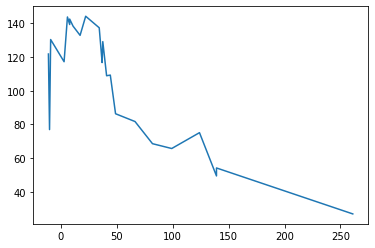

In [102]:
xcor = []
xcor_dt = []

wave_new = np.arange(4500, 9000, 10)

flux = spec_late['col2']
odp_datin = np.array(flux/np.nanmax(flux), dtype=[('flux', float), ('ivar', float)], copy=True)
wave = spec_late['col1']
#print(odp_datin.shape, wave.shape)
out = speclite.resample(odp_datin, wave, wave_new, ('flux', 'ivar'))
odp_resampled = out['flux']

for i in range(len(sn2008ax_specs['SN2008ax']['spectra'])):
    s = sn2008ax_specs['SN2008ax']['spectra'][i]
    #print(i, len(s[1][0]))
    dt = float(s[0]) - peak_epoch
    if len(s[1][0]) == 2:
        wave_raw, flux_raw = zip(*s[1])
    elif len(s[1][0]) == 3:
        wave_raw, flux_raw, err = zip(*s[1])
    else:
        continue
    wave = np.array(list(map(float, wave_raw)))
    flux = np.array(list(map(float, flux_raw)))
    if wave.min() > 4500:
        continue
    if wave.max() < 9000:
        continue
    #wave_new = np.arange(4500, 9000, 10)
    #datin = np.ones((5,), [('flux', float), ('ivar', float)])
    datin = np.array(flux/np.nanmax(flux), dtype=[('flux', float), ('ivar', float)], copy=True)
    #print(datin)
    out = speclite.resample(datin, wave, wave_new, ('flux', 'ivar'))
    #print(out['flux'])
    print(i, dt, np.correlate(odp_resampled, out['flux']))
    xcor.append(np.correlate(odp_resampled, out['flux']))
    xcor_dt.append(dt)
plt.plot(xcor_dt, xcor)

In [61]:
spec_late['col1']

<Column name='col1' dtype='float64' length=1697>
          3700.0
3703.50179600716
3707.00359201431
3710.50538802147
3714.00718402863
3717.50898003578
3721.01077604294
 3724.5125720501
3728.01436805725
3731.51616406441
3735.01796007157
3738.51975607872
             ...
9600.52627205849
9604.02806806565
9607.52986407281
9611.03166007996
9614.53345608712
9618.03525209428
9621.53704810143
9625.03884410859
9628.54064011575
 9632.0424361229
9635.54423213006
9639.04602813721

In [63]:
np.arange?

In [78]:
data = np.ones((5,), [('flux', float), ('ivar', float)])

In [82]:
data

array([(1., 1.), (1., 1.), (1., 1.), (1., 1.), (1., 1.)],
      dtype=[('flux', '<f8'), ('ivar', '<f8')])

In [83]:
datin

array([(1., 1.), (1., 1.), (1., 1.), (1., 1.), (1., 1.)],
      dtype=[('flux', '<f8'), ('ivar', '<f8')])